In [1]:
import numpy as np
import pandas as pd
import os

from bec import *
from monet import *
import al_utils
from pathlib import Path


import warnings
warnings.filterwarnings('ignore')

np.random.seed(69)

In [2]:
class DoubleWell:
    config = get_double_well_config()
    sims = [ sim(g, config) for g in np.linspace(0.1, 5, 100) ]
    tr, _, _ = make_dataset(sims)
   
def evaluate(gp, harmonic_sims, low=1, high=100, n=100):
    
    def _evaluate(g):
        gt = get_closest_sim(harmonic_sims, g)
        pr, pr_sigma = gp.predict(gt[['x', 'g']])
        return ((pr - gt.psi)**2).sum().mean()
    
    return np.array([_evaluate(g) for g in np.linspace(low, high, n)]).mean()

In [3]:
gp = GPApproximation()
doublewell_data = DoubleWell.tr.sample(500)
print(f"### Created Train, Test and Validation Sample")
gp.fit(doublewell_data[['x', 'g']], doublewell_data.psi)
DoubleWell.gp = gp
print(f"### Trained GP in train dataset")



### Created Train, Test and Validation Sample
### Trained GP in train dataset


In [23]:
double_loss_gp_loss = evaluate(gp, DoubleWell.sims, low=5, high=10)
print(f"### Loss of the trained GP - {double_loss_gp_loss}")

### Loss of the trained GP - 1.8686852763562584e-05


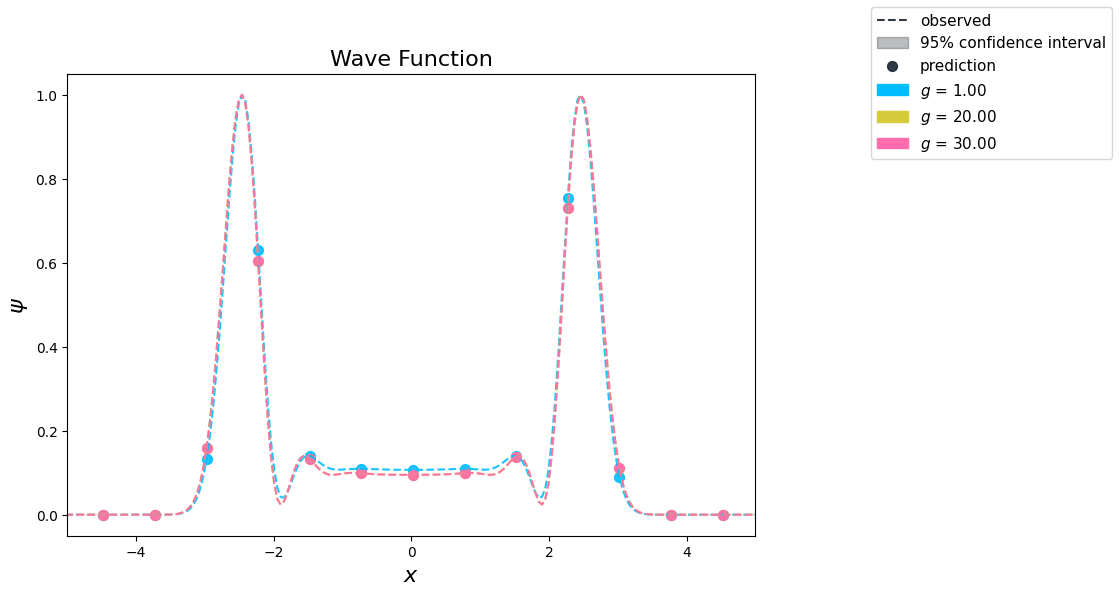

In [24]:
save_path = "DoubleWell_exp"
if os.path.isdir(save_path) == False:
    os.mkdir(save_path)
al_utils.plot([1, 20, 30], DoubleWell.sims, gp, save_file=os.path.join(save_path, f'{save_path}.svg'), act_op=False, min_gs=-5, max_gs=5)

In [20]:
print(f"###Starting active learning Process")
kernel = C(1.0, (1e-3, 1e3)) * RBF([5, 5], (1e-2, 1e2))
regressor = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=15)
ids = [int(i) for i in np.linspace(0, len(DoubleWell.tr)-1, 50)]
aclrnr = al_utils.ActLearn(
    regressor=regressor,
    init_ids=ids,
    trn_data=DoubleWell.tr,
    save_path=save_path,
    compare_loss=double_loss_gp_loss,
    exp_name='VTP_DoubleWell'
)

aclrnr.train(DoubleWell.sims, low=5, high=10, gs=[1, 20, 30], min_gs=-5, max_gs=5)



###Starting active learning Process
Loss for 51 - nan
Got min loss
Loss for 52 - 13.433250277643829
Got min loss
Loss for 53 - 13.429863733328371
Got min loss
Loss for 54 - 13.15870259310055
Got min loss
Loss for 55 - 10.591184880764908
Loss for 56 - 10.686463283134994
Got min loss
Loss for 57 - 2.316659149235438
Loss for 58 - 2.3391244492884007
Loss for 59 - 2.344833259439919
Got min loss
Loss for 60 - 2.1754345096673893
Loss for 61 - 2.1936809511527176
Loss for 62 - 2.2105996841443845
Loss for 63 - 2.2346469499161468
Got min loss
Loss for 64 - 1.8410459351177666
Got min loss
Loss for 65 - 0.41842481452722396
Loss for 66 - 0.43475614328453793
Loss for 67 - 0.44264108977023486
Loss for 68 - 0.45334251587154695
Got min loss
Loss for 69 - 0.19805850444850168
Loss for 70 - 0.20064383197199964
Got min loss
Loss for 71 - 0.19623076559717673
Loss for 72 - 0.19858673133249172
Got min loss
Loss for 73 - 0.0971494801429785
Got min loss
Loss for 74 - 0.09560994040565458
Got min loss
Loss for 75 

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f1e10edb4c0> (for post_execute):


KeyboardInterrupt: 